In [8]:
### the __repr__() magic method returns string for the object

class Account:
    '''
    A simple bank account
    '''
    owner: str
    balance: float

    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance

    def __repr__(self):
        return f'Account({self.owner!r}, {self.balance!r})'
    
    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        self.balance-= amount

    def inquiry(self):
        return self.balance

In [9]:
a = Account('Guido', 1000) # what happens is Calls Account.__init__(a, 'Guido', 1000.0), the self is the object a
print(a)

Account('Guido', 1000)


In [10]:
## you can access using either the dot or the getattr
print(a.owner)
print( getattr(a, 'owner') )

Guido
Guido


In [12]:
## You can view instance variables using the vars() function present in a key value pair dictionary
vars(a)

{'owner': 'Guido', 'balance': 1000}

In [14]:
isinstance(a, Account) # checks if a is an instance of Account

True

### Inheritance

when you need to inherit the abilities of a super class in a new class

In [15]:
class MyAcount(Account):
    def panic(self):
        self.withdraw(self.balance)

In [16]:
inherited_a = MyAcount('guido', 1000)
print(inherited_a)

Account('guido', 1000)


In [19]:
inherited_a.panic()
print(inherited_a)

Account('guido', 0)


In [21]:
### subtle ways inheritance can break

class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
    def __repr__(self):
        return f'Account({self.owner!r}, {self.balance!r})'

class EvilAccount(Account):
    pass

In [24]:
evil_a = EvilAccount('guido', 10)
print(evil_a) # why is Account here, shouldnt it be EvilAccount

Account('guido', 10)


In [31]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})' # remeber self becomes evil_a

class EvilAccount(Account):
    pass

In [33]:
evil_a = EvilAccount('guido', 10)
print(evil_a)

EvilAccount('guido', 10)


In [37]:
isinstance(evil_a, Account), isinstance(evil_a, EvilAccount)

(True, True)

In [42]:
### class variables ---> instead of having variables on a instance level, you can have them on a class level

# this program keeps track of how many times Account has been created

class Account:
    num_accounts = 0
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        Account.num_accounts += 1

    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    
    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        self.deposit(-amount)

    def inquiry(self):
        return self.balance

In [43]:
one = Account('guido', 10)
two = Account('ray', 20)

print(Account.num_accounts)

#you can also invoke it using the object
one.num_accounts, two.num_accounts

2


(2, 2)

In [44]:
### class methods, these are methods that are bound to the class and not the instance, here the cls is the class itself

class Student:
    marks = 0

    @classmethod
    def compute_marks(cls, obtained_marks):
        cls.marks = obtained_marks
        print('Obtained Marks:', cls.marks)

Student.compute_marks(100)

Obtained Marks: 100


In [67]:
## here is a good example of using class methods

import time

class Date:
    datefmt = '{year}-{month:02d}-{day:02d}'
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

    def __repr__(self):
        return self.datefmt.format(year=self.year,
                                  month=self.month,
                                  day=self.day)
    @classmethod
    def from_timestamp(cls, ts):
        tm = time.localtime(ts)
        return cls(tm.tm_year, tm.tm_mon, tm.tm_mday) # if you remove the cls, it becomes dumb dumb and returns everything as the same
    
    @classmethod
    def today(cls):
        return cls.from_timestamp(time.time())

class MDYDate(Date):
    datefmt = '{month}/{day}/{year}'
    
class DMYDate(Date):
    datefmt = '{day}/{month}/{year}'

In [65]:
a = Date(1967, 4, 9)
print(a)

b = MDYDate(1967, 4, 9)
print(b)

1967-04-09
4/9/1967


In [66]:
d1 = Date.today()
d2 = MDYDate.today()
d3 = DMYDate.today()

print(d1, d2, d3)

(2025, 1, 30) (2025, 1, 30) (2025, 1, 30)


In [68]:
## static method --> a method that just ended up being inside a class and takes in no self, no cls anything

class Ops:
    @staticmethod
    def add(x, y):
        return x + y
    
    @staticmethod
    def sub(x, y):
        return x- y

a = Ops.add(10, 20)
s = Ops.sub(20, 10)

print(a, s)

30 10


In [70]:
### private attributes --> use an _var by conventation to indicate its private, but you can still access it tho

class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self._balance = balance

    def __repr__(self):
        return f'Account({self.owner!r}, {self._balance!r})'
    
    def deposit(self, amount):
        self._balance += amount

    def withdraw(self, amount):
        self._balance-= amount

    def inquiry(self):
        return self._balance


a = Account('guido', 1000)
print(a._balance) # but rather you should use the inquiry method

1000


In [82]:
## if you want an even more private attribute, use __var, this is called name mangling


class A:
    def __init__(self):
        self.__x = 3 # Mangled to self._A__x

    def __spam(self):
        print('A.__spam', self.__x) # Mangled to _A__spam()
    
    def bar(self):
        self.__spam() # Only calls A.__spam()

a = A()
#print(a__x) # throws an error

print(a._A__x) # this works

A.__dict__ # here you can see the mangled names

3


mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.A.__init__(self)>,
              '_A__spam': <function __main__.A.__spam(self)>,
              'bar': <function __main__.A.bar(self)>,
              '__dict__': <attribute '__dict__' of 'A' objects>,
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              '__doc__': None})

In [86]:
# a.__spam() woont work
a._A__spam() # this works

A.__spam 3


In [87]:
# but you can call the bar
a.bar()

A.__spam 3


#### Property 

In [1]:
## property of a class ---> establish an attribute as a property and mainly used to create read only attributes

class Person:
    def __init__(self, name, age):
        self._name = name  # Private attribute (_name)
        self._age = age    # Private attribute (_age)

    @property
    def name(self):  # Getter method
        return self._name

    @property
    def age(self):  # Getter method
        return self._age

p = Person("Alice", 30)
print(p.name)  # ✅ Output: Alice (accessing method as an attribute)
print(p.age)   # ✅ Output: 30

p.name = "Bob"  # ❌ AttributeError: can't set attribute

Alice
30


AttributeError: property 'name' of 'Person' object has no setter

In [2]:
## you can also use the setter to allow for modifications

class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):  # Getter
        return self._name

    @name.setter
    def name(self, new_name):  # Setter
        if isinstance(new_name, str):
            self._name = new_name
        else:
            raise ValueError("Name must be a string")

p = Person("Alice")
print(p.name)  # ✅ Output: Alice

p.name = "Bob"  # ✅ Allowed (calls setter)
print(p.name)   # ✅ Output: Bob

p.name = 123  # ❌ Raises ValueError: Name must be a string

Alice
Bob


ValueError: Name must be a string

In [3]:
### you can set property two ways


# First Case: Read-Only Property (Account)

class Account:
    def __init__(self, owner, balance):
        self._owner = owner  # ✅ Store value in a private variable
        self._balance = balance

    @property
    def owner(self):  # ✅ Read-only property
        return self._owner

#a = Account("alice", 20)
#print(a.owner)  # ✅ Output: alice
#a.owner = "bob"  # ❌ AttributeError: can't set attribute

# @property allows owner to be accessed like an attribute, but it cannot be modified.
# When print(a.owner) is called, it executes return self._owner.
# However, a.owner = "bob" raises an AttributeError because no setter is defined.

#✅ Use Case: When you want owner to be read-only.

# Second Case: Read-Write Property (Account2)

class Account2:
    def __init__(self, owner, balance):
        self.owner = owner  # ✅ Calls the setter method
        self.balance = balance

    @property
    def owner(self):
        return self._owner  # ✅ Getter method

    @owner.setter
    def owner(self, new_owner):
        self._owner = new_owner  # ✅ Allows modifying _owner

a = Account2("alice", 20)
print(a.owner)  # ✅ Output: alice

a.owner = "bob"  # ✅ Allowed due to the setter
print(a.owner)  # ✅ Output: bob

# self.owner = owner in __init__() calls the setter method (@owner.setter).
# The setter stores the value in _owner.
# Since a setter exists, a.owner = "bob" updates _owner successfully.

#✅ Use Case: When you need a controlled way to modify the attribute.

alice
alice


### what happens when you use the self

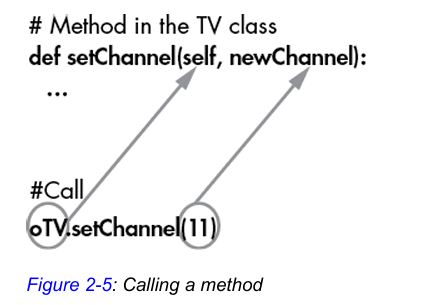

### Memory Management

The period of time from the instantiation of an object until it is destroyed is known as the object’s lifetime.

Whenever a program instantiates an object from a class, Python allocates memory for the storage of the instance variables defined in the class. Each object also contains an extra internal field called a reference count, which keeps track of how many different variables refer to that object.

In [1]:
class Square(): 
    def __init__(self, width, color): 
        self.width = width 
        self.color = color 

oSquare1 = Square(5, 'red') 
print(oSquare1) 
# Reference count of the Square object is 1

oSquare2 = oSquare1 
print(oSquare2) 
# Reference count of the Square object is 2

The reference count of an object is important because when it reaches zero, Python marks the relevant memory as no longer in use by the
program. This is known as being marked as garbage. 
Python has a garbage collector that runs to reclaim any blocks of memory that have been marked as garbage.

In [2]:
import sys

print('Reference count is', sys.getrefcount(oSquare1)) # why 3? because the getrefcount function itself is holding a reference to the object

Reference count is 3


In [4]:
## How are reference counts increased ?

# 1. When an object is created and assigned to a variable.

oSquare2 = oSquare1

# 2. When an object is passed as an argument to a function.

def myFunctionOrMethod(oLocalSquareParam): 
    # oLocalSquareParam now refers to wherever the argument 
    #refers to
    pass

myFunctionOrMethod(oSquare1)  # call the function and pass in the object

# 3. When an object is stored in a data structure like a list or dictionary.

myList = [oSquare1, someValue := 10]

In [ ]:
## how can you decrement the reference count?

# 1. When a variable goes out of scope.

def myFunctionOrMethod():
    oSquare1 = Square(5, 'red') 
    # oSquare1 goes out of scope here

# 2. When a variable is reassigned to a different object.

oSquare2 = Square(5, 'red')
oSquare2 = Square(10, 'blue') # the first object is now unreferenced

# 3. When an object is explicitly deleted using the del keyword.

oSquare3 = Square(5, 'red')
del oSquare3 # the object is now unrefrenced

# 4. When an object is removed from a data structure like a list or dictionary.

myList = [oSquare1, someValue := 10]
myList.remove(oSquare1) # the object is now unreferenced

In [6]:
### an example

class Student(): 
    def __init__(self, name): 
        self.name = name 
        print('Creating Student object', self.name) 
    
    def __del__(self): 
        print('In the __del__ method for student:', self.name) 


class Teacher(): 
    def __init__(self): 
        print('Creating the Teacher object') 

        self.oStudent1 = Student('Joe') 
        self.oStudent2 = Student('Sue') 
        self.oStudent3 = Student('Chris') 

    def __del__(self): 
        print('In the __del__ method for Teacher')

In [7]:
t1 = Teacher()
print(sys.getrefcount(t1))

Creating the Teacher object
Creating Student object Joe
Creating Student object Sue
Creating Student object Chris
2


In [8]:
del t1

In the __del__ method for Teacher
In the __del__ method for student: Joe
In the __del__ method for student: Sue
In the __del__ method for student: Chris


In [ ]:
## at the beginning,  the Teacher object has three instance variables that are Student objects.
## When the Teacher object is deleted, Python sees that it contains three other objects (the three Student objects). So, Python lowers the reference count of each of those objects from 1 to 0.

### Manage Memory with slots

when you instantiate an object, Python must allocate
 space for the instance variables defined in the class. By default, Python
 does this using a dictionary with a special name: __dict__

In [9]:
class Student(): 
    def __init__(self, name): 
        self.name = name 
        print(self.__dict__)

In [13]:
s1 = Student("jino")
s2 = Student("rohit")

{'name': 'jino'}
{'name': 'rohit'}


These dictionaries can grow as you keep adding instance variables. In order to allow for this dynamic capability, dictionaries are typically
 implemented starting with enough empty space to represent some number
 of instance variables .


 But if you have a class with a fixed instance variable, like Student class having name alone, then imagine you create millions of objects, plenty of RAM is wasted.

To combat this potential waste, Python gives us a different approach,
 known as slots, to represent the instance variables. The idea is that you can
 tell Python the names of all the instance variables up front, and Python will
 use a data structure that allocates exactly enough space for just those
 instance variables

In [16]:
class PointWithSlots(): 
    # Define slots for only two instance variables 
    __slots__ = ['x', 'y'] 

    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
        print(x, y)

PointWithSlots(10, 20)

10 20


In [17]:
# if you try to add a new attribute it throws an error

class PointWithSlots(): 
    # Define slots for only two instance variables 
    __slots__ = ['x', 'y'] 
    def __init__(self, x, y, z): 
        self.x = x 
        self.y = y 
        self.z = z

PointWithSlots(10, 20, 30)

AttributeError: 'PointWithSlots' object has no attribute 'z'

In [10]:
### inheritance

class Animal:
    def __init__(self, name):
        self.name = name
    
    def walk(self):
        print("walking")


class Dog(Animal):
    def __init__(self, name):
        super().__init__(name)
    

o1 = Dog("timmy")

print(vars(o1))

{'name': 'timmy'}


In [17]:
## use abstract base classes for interfaces

from abc import ABC, abstractmethod

class Stream(ABC):

    def __init__(self, data):
        super().__init__()
        self.data = data

    @abstractmethod
    def read(self):
        pass

    def write(self):
        print(self.data)


class KafkaStream(Stream):
    def __init__(self, data):
        super().__init__(data)
        self.data = data
    
    def read(self):
        print("reading")

In [20]:
print(vars(KafkaStream("hello")))

{'data': 'hello'}


### inspect module

The inspect module provides several useful functions to help get information about live objects such as modules, classes, methods, functions, tracebacks, frame objects, and code objects. For example, it can help you examine the contents of a class, retrieve the source code of a method, extract and format the argument list for a function, or get all the information you need to display a detailed traceback.

In [22]:
import inspect

# Example class to demonstrate inspect functionality
class Person:
    """A simple person class for demonstration."""
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def greet(self):
        """Say hello."""
        return f"Hello, I'm {self.name}"

In [27]:
p = Person("jino", 20)
inspect.getsource(p.greet)

'    def greet(self):\n        """Say hello."""\n        return f"Hello, I\'m {self.name}"\n'

In [24]:
# get the source code of the class
source = inspect.getsource(Person) # run from terminal

# get the documentation
source = inspect.getdoc(Person)
print(source)

A simple person class for demonstration.


In [36]:
inspect.signature(Person), inspect.signature(p.__init__)

(<Signature (name, age)>, <Signature (name, age)>)

In [38]:
# 4. Getting class members
print("\n# Class members:")
members = inspect.getmembers(Person)
for name, member in members:
    if not name.startswith('__'):  # Skip magic methods
        print(f"{name}: {member}")


# Class members:
greet: <function Person.greet at 0x00000228A3E50FE0>
